In [13]:
import networkx as nx
import osmnx as ox
import os.path

# Get data for places using Lat Long

point = (18.5246165, 73.8629674)
G1 = ox.graph_from_point(point, dist=15000, retain_all=True, simplify = True, network_type='all')
G2 = ox.graph_from_point(point, dist=15000, dist_type='bbox', network_type='all', 
                        simplify=True, retain_all=True, truncate_by_edge=False, clean_periphery=True, custom_filter='["waterway"~"river"]')
Gwater = nx.compose(G1, G2)

u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in Gwater.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)

In [14]:
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in Gwater.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)

In [15]:
# List to store colors
roadColors = []
roadWidths = []

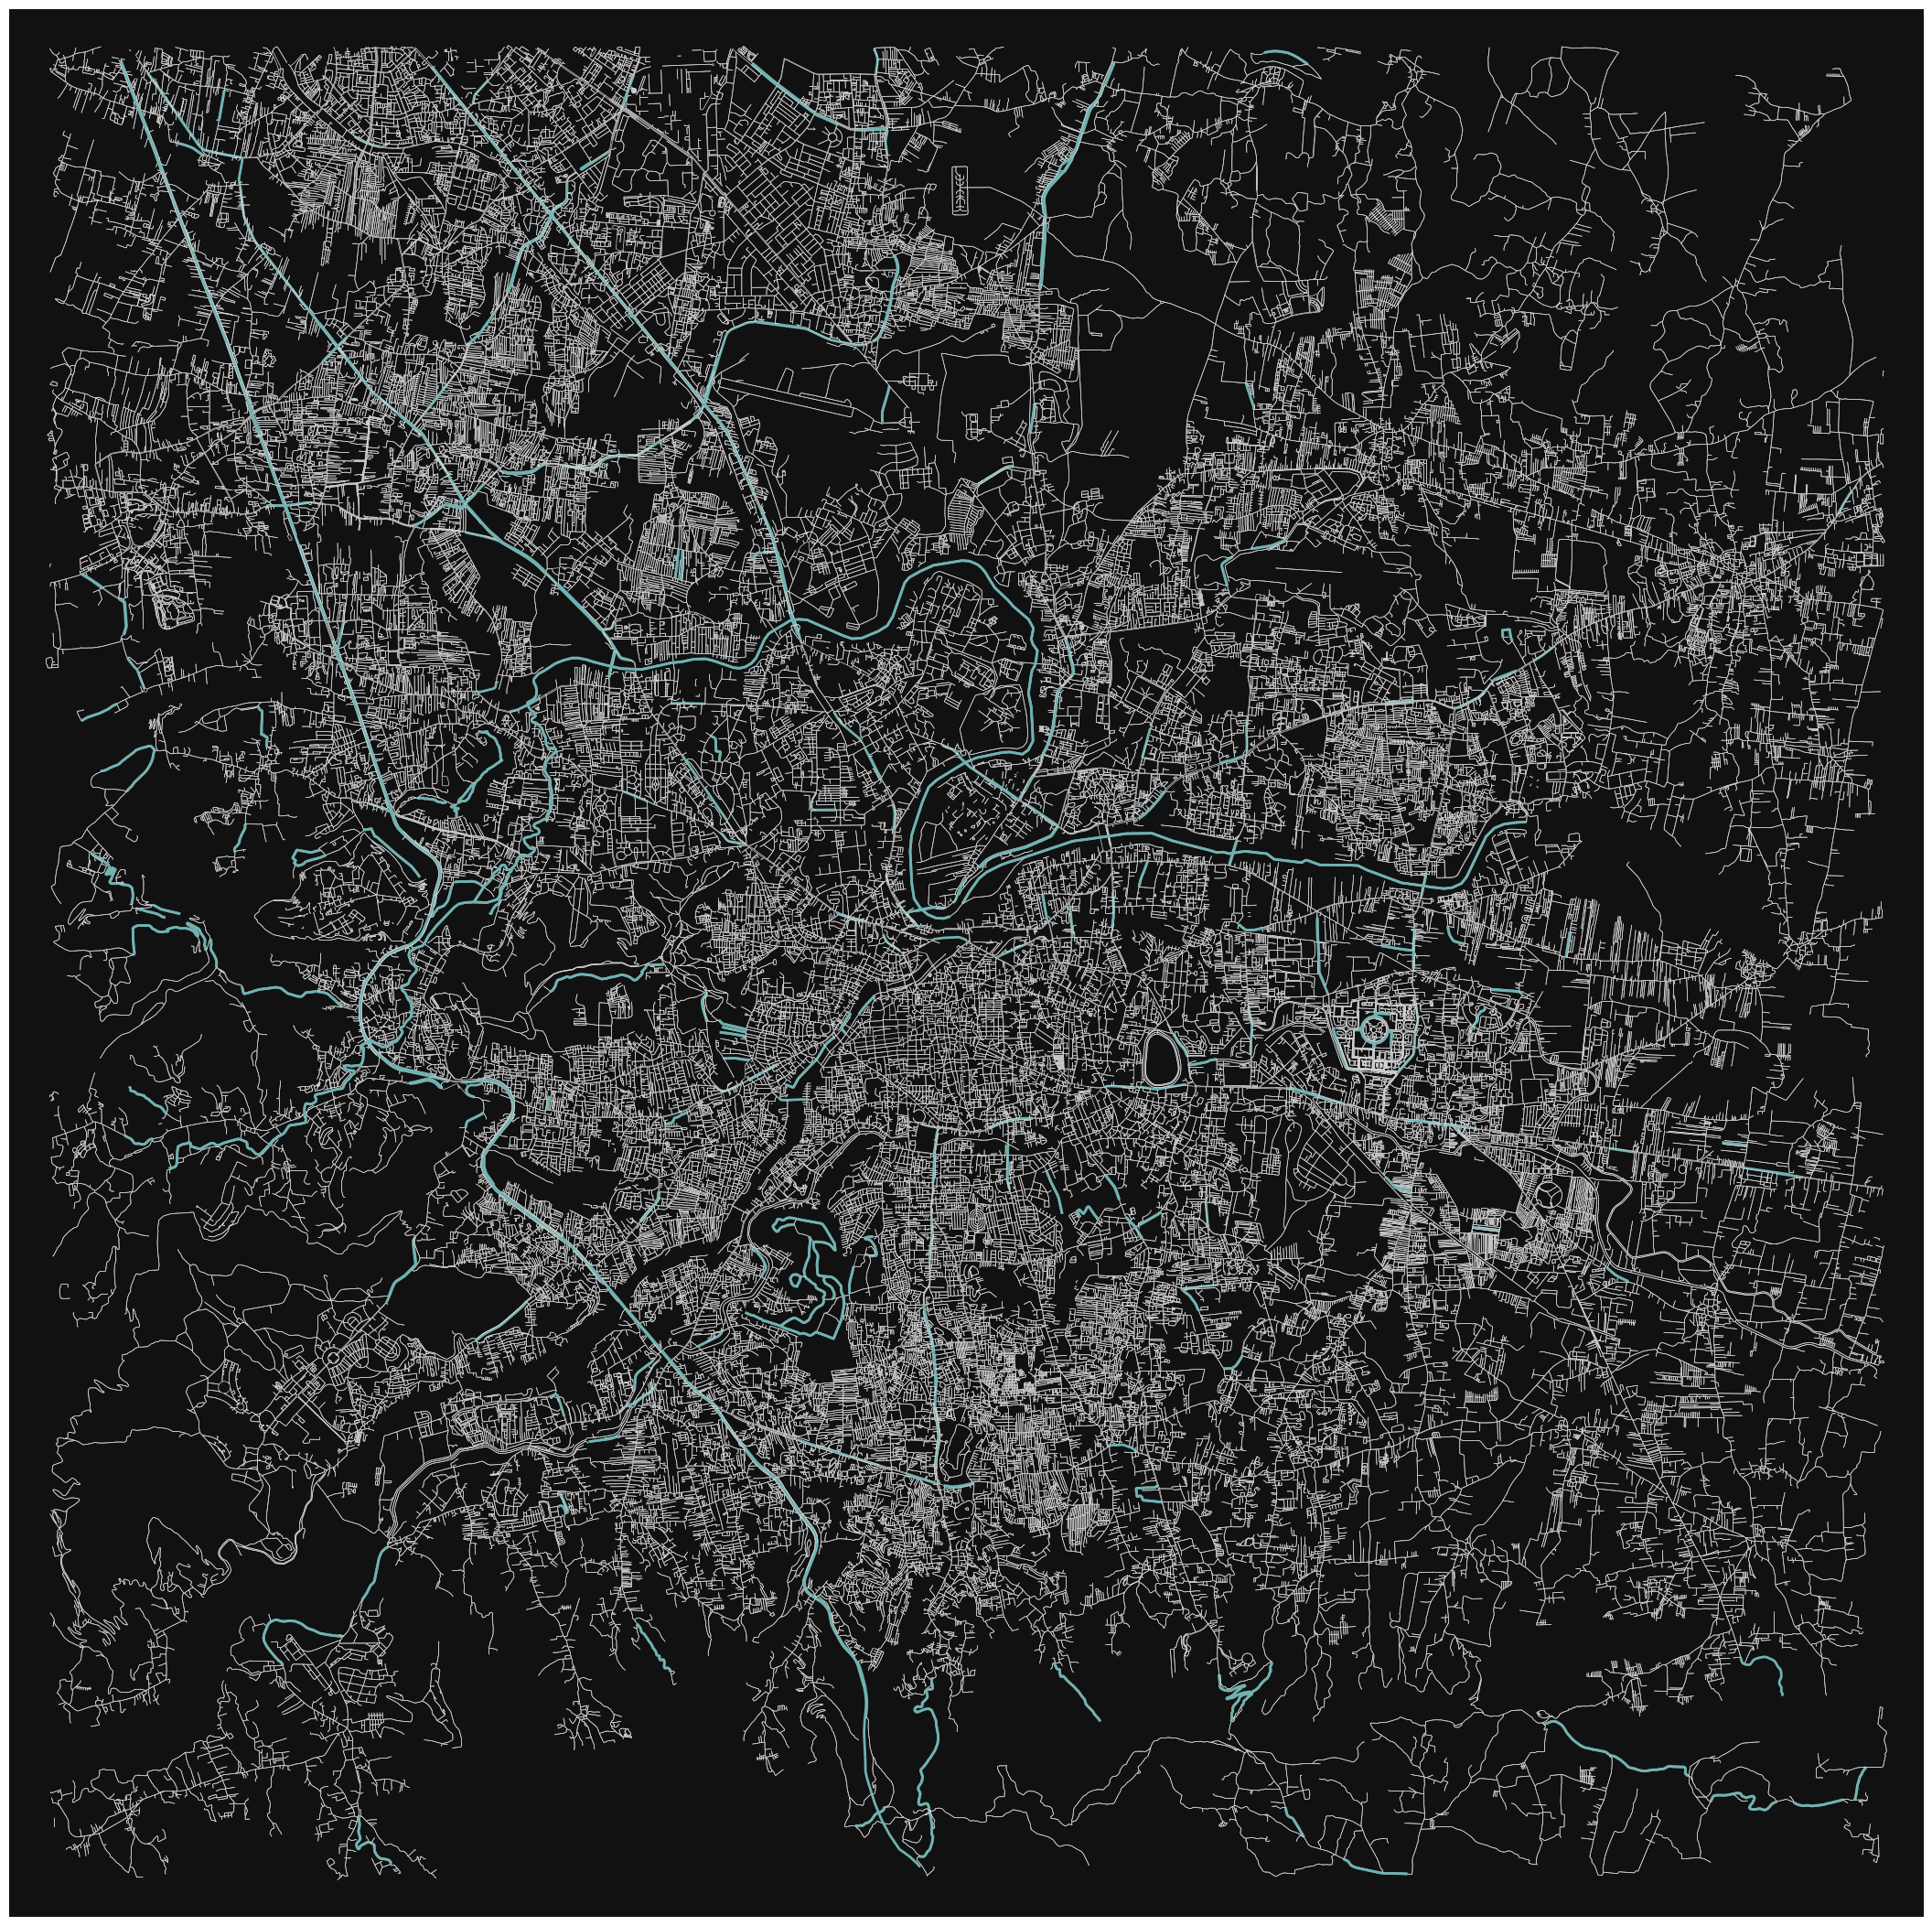

In [16]:
# #72b1b1
# #5dc1b9
for item in data:
    if "name" in item.keys():
        if item["length"] > 400: 
            color = "#72b1b1"
            linewidth = 2
        else:
            color = "#d5d5d5"
            linewidth = 0.5
    else:
        color = "#d5d5d5"
        linewidth = 0.5
    roadColors.append(color)    
    roadWidths.append(linewidth)


fig, ax = ox.plot_graph(Gwater, node_size=0,figsize=(27, 40), 
                        dpi = 300, save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)

fig.tight_layout(pad=0)

# Change this path to your local dir "/Users/Ajinkya/Downloads/RoadofPune.png"

fig.savefig("/Users/Ajinkya/Downloads/RoadofPune.png", dpi=300, bbox_inches='tight', format="png", 
            facecolor='#000000', transparent=False)